In [26]:
from keras.datasets import mnist
import keras
import tensorflow as tf
import numpy as np
import seaborn as sns
(train_X, train_y), (test_X, test_y) = mnist.load_data()
train_X = train_X/255.0
test_X = test_X/255.0

In [27]:
def calcDarkness(image):
    sum = 0
    for row in image:
        for col in row:
            sum += col
    return sum

In [28]:
totals = [[] for i in range (0,10)]
for i in range(len(train_X)):
    totals[train_y[i]].append(calcDarkness(train_X[i]))

averages = [sum(i)/len(i) for i in totals]

#There will be ten total darkness because there are 10 digits (0-9)

def averagePredict(image):
    min = 0
    dark = calcDarkness(image)
    for i in range(len(averages)):
        if (abs(dark - averages[i]) < abs(dark - averages[min])):
            min = i
    return min

In [29]:
correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_X)):
    if (averagePredict(test_X[i]) == test_y[i]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

for i in range(len(measured)):
    print(f'{i}: {correctGuess[i]/measured[i]}')

#the digits 0 and 1 had the best results

0: 0.5510204081632653
1: 0.826431718061674
2: 0.04941860465116279
3: 0.048514851485148516
4: 0.048879837067209775
5: 0.08071748878923767
6: 0.060542797494780795
7: 0.2898832684824903
8: 0.13449691991786447
9: 0.044598612487611496


[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Average Darkness Heat Map')]

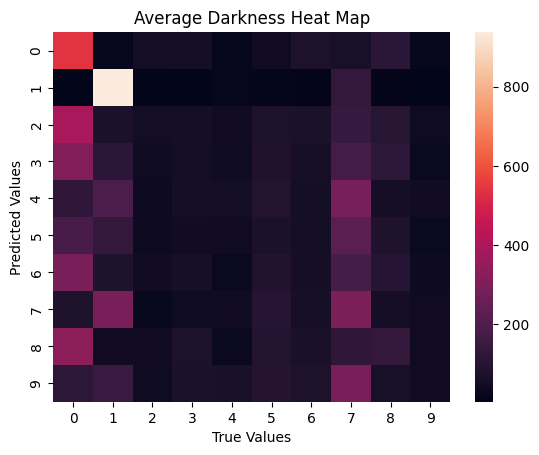

In [30]:
results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][averagePredict(test_X[i])] += 1
averageMap = sns.heatmap(results)
averageMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Average Darkness Heat Map')

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2584
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1117
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0786
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0582
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0459
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0363
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0288
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0228
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0196
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0160


In [32]:
predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

313/313 [==============================] - 0s 769us/step


In [33]:
correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

for i in range(len(measured)):
    print(f'{i}: {correctGuess[i]/measured[i]}')

0: 0.9877551020408163
1: 0.9920704845814978
2: 0.9680232558139535
3: 0.9772277227722772
4: 0.9684317718940937
5: 0.984304932735426
6: 0.9832985386221295
7: 0.9747081712062257
8: 0.9722792607802875
9: 0.981169474727453


[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

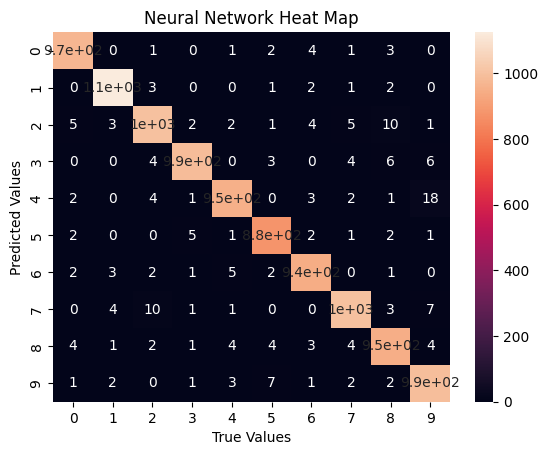

In [34]:
results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/5
6000/6000 [==============================] - 6s 925us/step - loss: 0.2161
Epoch 2/5
6000/6000 [==============================] - 5s 904us/step - loss: 0.0963
Epoch 3/5
6000/6000 [==============================] - 5s 894us/step - loss: 0.0674
Epoch 4/5
6000/6000 [==============================] - 5s 895us/step - loss: 0.0504
Epoch 5/5
313/313 [==============================] - 0s 731us/step
0: 0.9826530612244898
1: 0.9841409691629956
2: 0.9680232558139535
3: 0.9554455445544554
4: 0.9765784114052953
5: 0.9730941704035875
6: 0.9718162839248434
7: 0.9854085603112841
8: 0.9804928131416838
9: 0.9692765113974232


[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

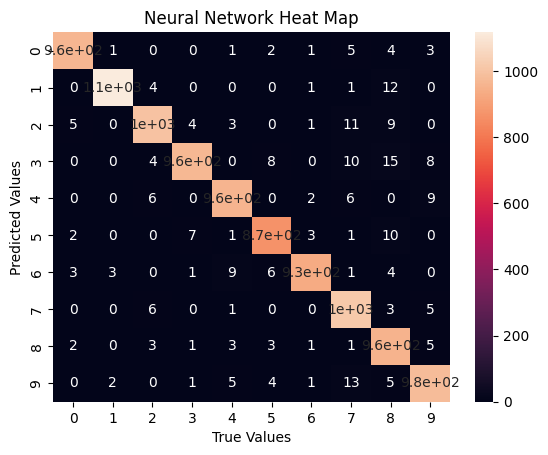

In [35]:
#FIVE EPOCHS
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=5, batch_size=10)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

for i in range(len(measured)):
    print(f'{i}: {correctGuess[i]/measured[i]}')

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/15
6000/6000 [==============================] - 6s 913us/step - loss: 0.2136
Epoch 2/15
6000/6000 [==============================] - 5s 896us/step - loss: 0.0939
Epoch 3/15
6000/6000 [==============================] - 5s 886us/step - loss: 0.0641
Epoch 4/15
6000/6000 [==============================] - 5s 889us/step - loss: 0.0504
Epoch 5/15
6000/6000 [==============================] - 5s 891us/step - loss: 0.0379
Epoch 6/15
6000/6000 [==============================] - 5s 890us/step - loss: 0.0317
Epoch 7/15
6000/6000 [==============================] - 5s 894us/step - loss: 0.0260
Epoch 8/15
6000/6000 [==============================] - 5s 890us/step - loss: 0.0218
Epoch 9/15
6000/6000 [==============================] - 5s 894us/step - loss: 0.0194
Epoch 10/15
6000/6000 [==============================] - 5s 896us/step - loss: 0.0173
Epoch 11/15
6000/6000 [==============================] - 5s 889us/step - loss: 0.0153
Epoch 12/15
6000/6000 [==============================] - 5s 890

[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

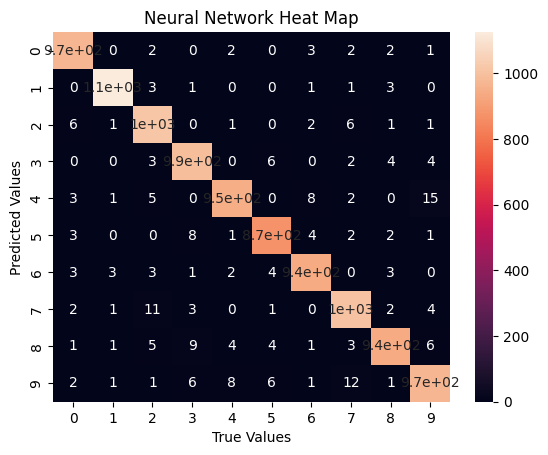

In [36]:
#FIFTEEN EPOCHS
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=15, batch_size=10)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/30
6000/6000 [==============================] - 6s 914us/step - loss: 0.2097
Epoch 2/30
6000/6000 [==============================] - 5s 909us/step - loss: 0.0919
Epoch 3/30
6000/6000 [==============================] - 5s 893us/step - loss: 0.0621
Epoch 4/30
6000/6000 [==============================] - 5s 888us/step - loss: 0.0494
Epoch 5/30
6000/6000 [==============================] - 5s 895us/step - loss: 0.0389
Epoch 6/30
6000/6000 [==============================] - 5s 894us/step - loss: 0.0317
Epoch 7/30
6000/6000 [==============================] - 5s 895us/step - loss: 0.0256
Epoch 8/30
6000/6000 [==============================] - 5s 894us/step - loss: 0.0219
Epoch 9/30
6000/6000 [==============================] - 5s 891us/step - loss: 0.0191
Epoch 10/30
6000/6000 [==============================] - 5s 897us/step - loss: 0.0167
Epoch 11/30
6000/6000 [==============================] - 6s 971us/step - loss: 0.0151
Epoch 12/30
6000/6000 [==============================] - 5s 890

[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

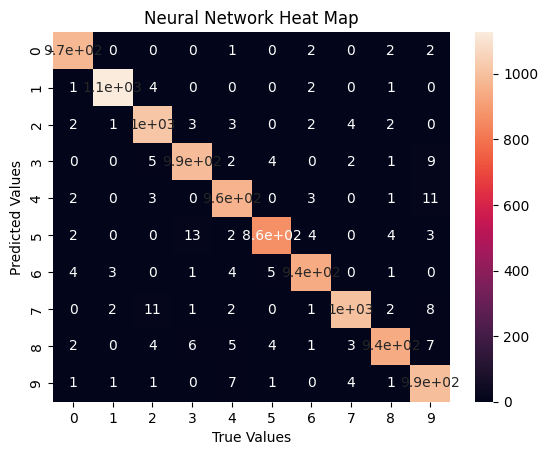

In [37]:
#THIRTY EPOCHS
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=30, batch_size=10)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/60
6000/6000 [==============================] - 6s 1ms/step - loss: 0.2128
Epoch 2/60
6000/6000 [==============================] - 6s 1ms/step - loss: 0.0941
Epoch 3/60
6000/6000 [==============================] - 6s 1ms/step - loss: 0.0645
Epoch 4/60
6000/6000 [==============================] - 6s 987us/step - loss: 0.0493
Epoch 5/60
6000/6000 [==============================] - 6s 996us/step - loss: 0.0382
Epoch 6/60
6000/6000 [==============================] - 6s 994us/step - loss: 0.0338
Epoch 7/60
6000/6000 [==============================] - 6s 989us/step - loss: 0.0257
Epoch 8/60
6000/6000 [==============================] - 6s 996us/step - loss: 0.0215
Epoch 9/60
6000/6000 [==============================] - 6s 997us/step - loss: 0.0196
Epoch 10/60
6000/6000 [==============================] - 6s 997us/step - loss: 0.0161
Epoch 11/60
6000/6000 [==============================] - 6s 1ms/step - loss: 0.0143
Epoch 12/60
6000/6000 [==============================] - 6s 992us/step 

[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

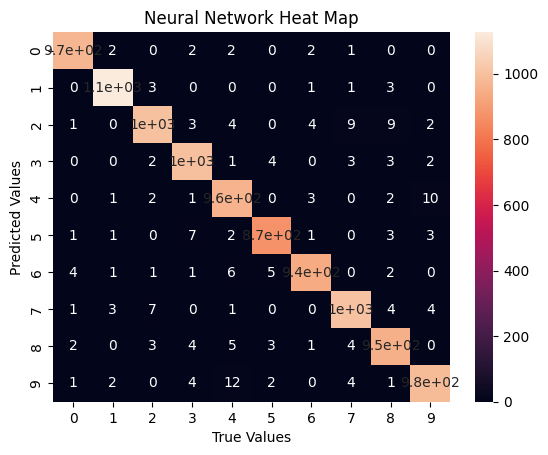

In [38]:
#SIXTY EPOCHS
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=60, batch_size=10)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/30
12000/12000 [==============================] - 11s 899us/step - loss: 0.2005
Epoch 2/30
12000/12000 [==============================] - 11s 889us/step - loss: 0.0921
Epoch 3/30
12000/12000 [==============================] - 11s 889us/step - loss: 0.0666
Epoch 4/30
12000/12000 [==============================] - 11s 892us/step - loss: 0.0520
Epoch 5/30
12000/12000 [==============================] - 11s 897us/step - loss: 0.0443
Epoch 6/30
12000/12000 [==============================] - 11s 890us/step - loss: 0.0352
Epoch 7/30
12000/12000 [==============================] - 11s 890us/step - loss: 0.0311
Epoch 8/30
12000/12000 [==============================] - 11s 893us/step - loss: 0.0278
Epoch 9/30
12000/12000 [==============================] - 11s 892us/step - loss: 0.0248
Epoch 10/30
12000/12000 [==============================] - 11s 889us/step - loss: 0.0217
Epoch 11/30
12000/12000 [==============================] - 11s 891us/step - loss: 0.0200
Epoch 12/30
12000/12000 [=====

[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

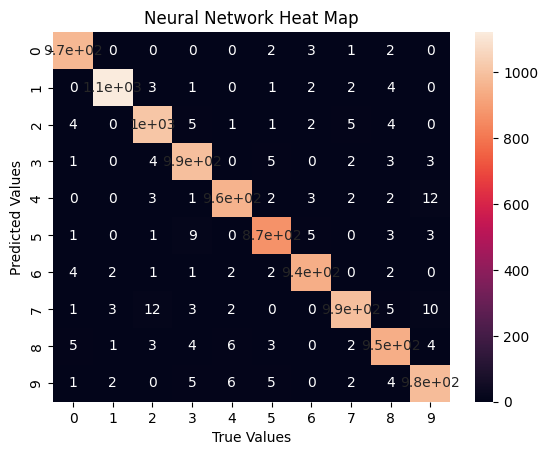

In [39]:
#BATCH SIZE 5
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=30, batch_size=5)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/30
6000/6000 [==============================] - 6s 1ms/step - loss: 0.2118
Epoch 2/30
6000/6000 [==============================] - 6s 1000us/step - loss: 0.0941
Epoch 3/30
6000/6000 [==============================] - 6s 991us/step - loss: 0.0668
Epoch 4/30
6000/6000 [==============================] - 6s 992us/step - loss: 0.0520
Epoch 5/30
6000/6000 [==============================] - 6s 992us/step - loss: 0.0386
Epoch 6/30
6000/6000 [==============================] - 6s 993us/step - loss: 0.0322
Epoch 7/30
6000/6000 [==============================] - 6s 990us/step - loss: 0.0265
Epoch 8/30
6000/6000 [==============================] - 6s 992us/step - loss: 0.0241
Epoch 9/30
6000/6000 [==============================] - 6s 994us/step - loss: 0.0192
Epoch 10/30
6000/6000 [==============================] - 6s 992us/step - loss: 0.0178
Epoch 11/30
6000/6000 [==============================] - 6s 992us/step - loss: 0.0159
Epoch 12/30
6000/6000 [==============================] - 6s 992u

[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

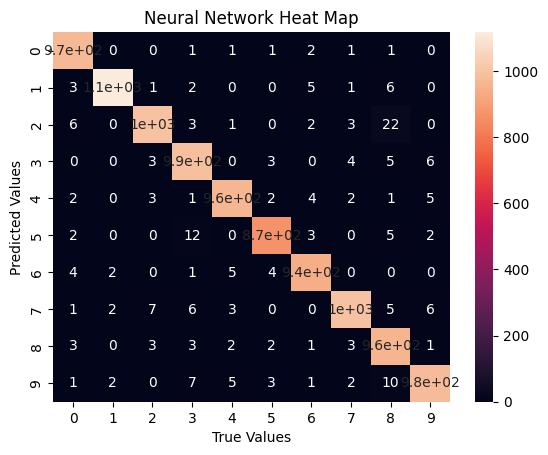

In [40]:
#BATCH SIZE 10
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=30, batch_size=10)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.2870
Epoch 2/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.1256
Epoch 3/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0878
Epoch 4/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0664
Epoch 5/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0522
Epoch 6/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0402
Epoch 7/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0326
Epoch 8/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0260
Epoch 9/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0215
Epoch 10/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0171
Epoch 11/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0146
Epoch 12/30
1200/1200 [==============================] - 2s 1ms/step - loss: 0.0120
E

[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

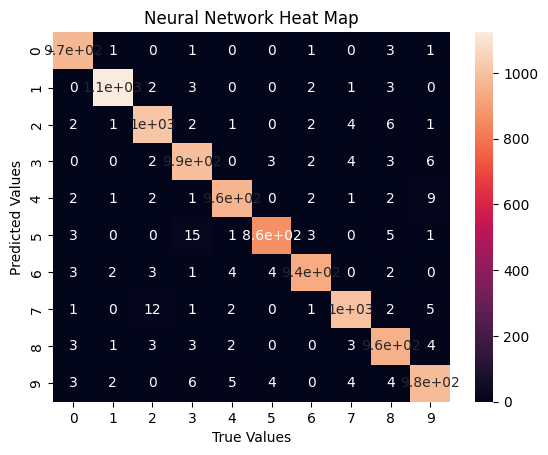

In [41]:
#BATCH SIZE 50
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=30, batch_size=50)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/30
600/600 [==============================] - 1s 2ms/step - loss: 0.3325
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1474
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 0.1056
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0818
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0662
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0544
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0456
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0369
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0308
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0258
Epoch 11/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0219
Epoch 12/30
600/600 [==============================] - 1s 2ms/step - loss: 0.0177
Epoch 13/30
600/600 [====

[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

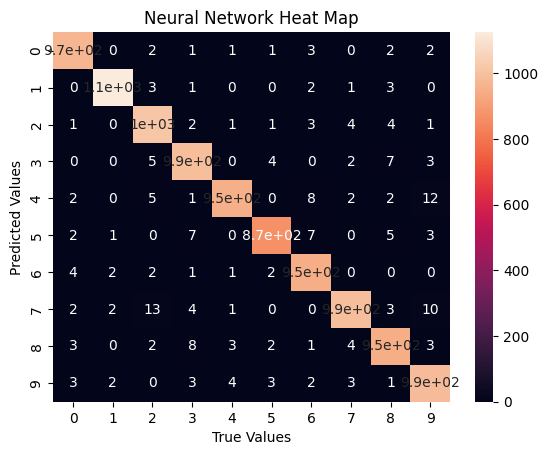

In [42]:
#BATCH SIZE 100
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=30, batch_size=100)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/30
6000/6000 [==============================] - 6s 916us/step - loss: 2.1160
Epoch 2/30
6000/6000 [==============================] - 5s 904us/step - loss: 2.0975
Epoch 3/30
6000/6000 [==============================] - 5s 901us/step - loss: 2.0942
Epoch 4/30
6000/6000 [==============================] - 5s 894us/step - loss: 2.1187
Epoch 5/30
6000/6000 [==============================] - 5s 899us/step - loss: 2.0203
Epoch 6/30
6000/6000 [==============================] - 5s 898us/step - loss: 2.0062
Epoch 7/30
6000/6000 [==============================] - 5s 895us/step - loss: 1.9830
Epoch 8/30
6000/6000 [==============================] - 5s 894us/step - loss: 2.0005
Epoch 9/30
6000/6000 [==============================] - 5s 894us/step - loss: 1.9950
Epoch 10/30
6000/6000 [==============================] - 5s 897us/step - loss: 2.1245
Epoch 11/30
6000/6000 [==============================] - 5s 898us/step - loss: 1.9354
Epoch 12/30
6000/6000 [==============================] - 5s 899

[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

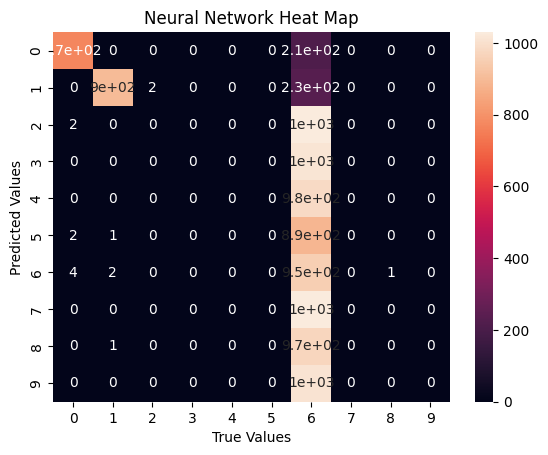

In [43]:
#Learning Rate 1.0
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-1), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=30, batch_size=10)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/30
6000/6000 [==============================] - 6s 922us/step - loss: 0.2220
Epoch 2/30
6000/6000 [==============================] - 6s 920us/step - loss: 0.0961
Epoch 3/30
6000/6000 [==============================] - 5s 912us/step - loss: 0.0650
Epoch 4/30
6000/6000 [==============================] - 5s 912us/step - loss: 0.0497
Epoch 5/30
6000/6000 [==============================] - 5s 908us/step - loss: 0.0395
Epoch 6/30
6000/6000 [==============================] - 6s 918us/step - loss: 0.0299
Epoch 7/30
6000/6000 [==============================] - 5s 911us/step - loss: 0.0258
Epoch 8/30
6000/6000 [==============================] - 5s 909us/step - loss: 0.0206
Epoch 9/30
6000/6000 [==============================] - 6s 925us/step - loss: 0.0188
Epoch 10/30
6000/6000 [==============================] - 5s 916us/step - loss: 0.0156
Epoch 11/30
6000/6000 [==============================] - 5s 911us/step - loss: 0.0149
Epoch 12/30
6000/6000 [==============================] - 5s 913

[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

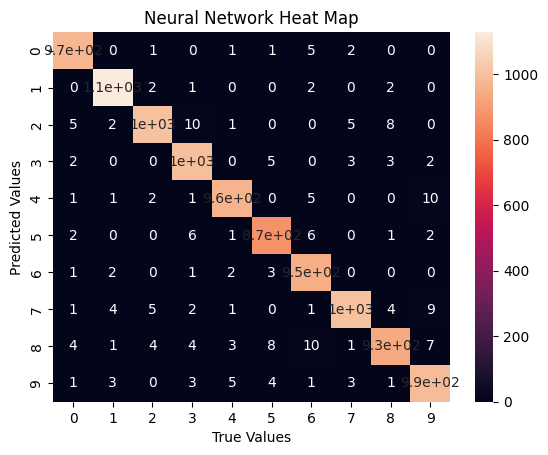

In [44]:
#Learning Rate 3.0
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-3), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=30, batch_size=10)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')

Epoch 1/30
6000/6000 [==============================] - 6s 911us/step - loss: 1.3183
Epoch 2/30
6000/6000 [==============================] - 5s 904us/step - loss: 0.5742
Epoch 3/30
6000/6000 [==============================] - 5s 897us/step - loss: 0.4302
Epoch 4/30
6000/6000 [==============================] - 5s 893us/step - loss: 0.3717
Epoch 5/30
6000/6000 [==============================] - 5s 894us/step - loss: 0.3378
Epoch 6/30
6000/6000 [==============================] - 5s 893us/step - loss: 0.3147
Epoch 7/30
6000/6000 [==============================] - 5s 895us/step - loss: 0.2970
Epoch 8/30
6000/6000 [==============================] - 5s 901us/step - loss: 0.2827
Epoch 9/30
6000/6000 [==============================] - 5s 890us/step - loss: 0.2707
Epoch 10/30
6000/6000 [==============================] - 5s 895us/step - loss: 0.2600
Epoch 11/30
6000/6000 [==============================] - 5s 894us/step - loss: 0.2506
Epoch 12/30
6000/6000 [==============================] - 5s 905

[Text(0.5, 23.52222222222222, 'True Values'),
 Text(50.722222222222214, 0.5, 'Predicted Values'),
 Text(0.5, 1.0, 'Neural Network Heat Map')]

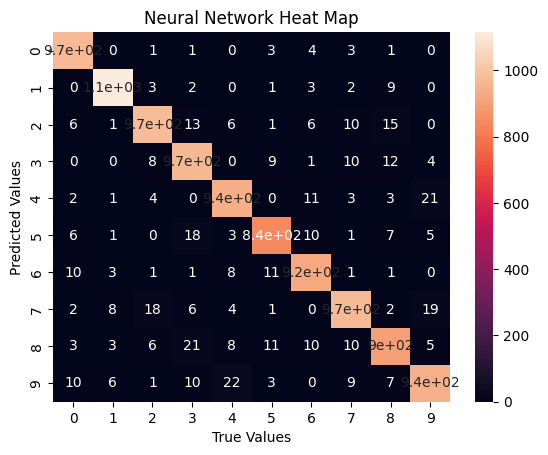

In [45]:
#Learning Rate 5.0
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=10)
])

model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

losses = model.fit(train_X, train_y, epochs=30, batch_size=10)

predicted = model.predict(test_X)

for i in range(len(predicted)):
    max = 0
    for j in range(len(predicted[i])):
        if predicted[i][j] > predicted[i][max]:
            max = j
    predicted[i]=max

correctGuess = [0 for i in range(0,10)]
measured = [0 for i in range(0, 10)]

for i in range(len(test_y)):
    if (test_y[i] == predicted[i][0]):
        correctGuess[test_y[i]] += 1
    measured[test_y[i]] += 1

results = [[0 for j in range(0,10)] for i in range(0,10)]
for i in range(len(test_X)):
    results[test_y[i]][int(predicted[i][0])] += 1
netMap = sns.heatmap(results, annot=True)
netMap.set(xlabel = 'True Values', ylabel = 'Predicted Values', title = 'Neural Network Heat Map')